In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [3]:
cust_an = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
cust_an

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
numericalx = cust_an.select_dtypes(np.number)
categoricalx = cust_an.select_dtypes(object)

####  X-y split (y is the target variable, which is the total claim amount)


In [5]:
x = numericalx.drop('total_claim_amount', axis=1)
y = numericalx.total_claim_amount

In [6]:
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [7]:
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

#### Train-test split.


In [8]:
x.isna().any()

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
dtype: bool

In [9]:
# test-train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TT_RATIO, random_state=RAND_STATE)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000
mean,8025.418872,51950.402165,93.312216,15.098637,47.857124,0.371558,2.987437
std,6990.063435,24807.850658,34.164711,10.083326,27.966835,0.890703,2.415773
min,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,3979.250000,29479.500000,69.000000,6.000000,24.000000,0.000000,1.000000
50%,5799.000000,50603.000000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,8936.750000,72332.500000,109.000000,23.000000,71.000000,0.000000,4.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


#### Standardize the data (after the data split).


In [10]:
y_train

2705     236
2209     511
4004     478
1898     768
10016    450
        ... 
5667     712
324      806
3157      35
5993     422
5242     552
Name: total_claim_amount, Length: 7482, dtype: int64

In [11]:
y_test

5613    542
9585     60
2042    303
7819    552
8261    345
       ... 
8764    209
7120    355
6782     60
1687     93
11      199
Name: total_claim_amount, Length: 3207, dtype: int64

In [12]:
sts = StandardScaler()

In [13]:
x_train_standarized = sts.fit_transform(x_train)
x_test_standarized = sts.transform(x_test)

In [14]:
x_train_standarized = pd.DataFrame(x_train_standarized)

In [15]:
x_train_standarized.describe()

,0,1,2,3,4,5,6
count,7.482000e+03,7.482000e+03,7.482000e+03,7.482000e+03,7.482000e+03,7.482000e+03,7.482000e+03
mean,-1.221494e-17,-3.024104e-17,-8.066997e-16,1.619261e-17,-7.799161e-17,-2.546153e-16,1.649086e-16
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-8.766485e-01,-1.689635e+00,-9.458407e-01,-1.497487e+00,-1.711324e+00,-4.171796e-01,-8.227467e-01
25%,-5.788845e-01,-9.058586e-01,-7.116653e-01,-9.024051e-01,-8.531076e-01,-4.171796e-01,-8.227467e-01
50%,-3.185333e-01,-5.431717e-02,-3.018584e-01,-1.089631e-01,5.109115e-03,-4.171796e-01,-4.087728e-01
75%,1.303839e-01,8.216536e-01,4.592116e-01,7.836592e-01,8.275668e-01,-4.171796e-01,4.191748e-01
max,1.077309e+01,1.936234e+00,5.991605e+00,1.973822e+00,1.828820e+00,5.196738e+00,2.489044e+00


In [16]:
x_train_standarized.mean()

0   -1.221494e-17
1   -3.024104e-17
2   -8.066997e-16
3    1.619261e-17
4   -7.799161e-17
5   -2.546153e-16
6    1.649086e-16
dtype: float64

In [17]:
x_train_standarized.std()

0    1.000067
1    1.000067
2    1.000067
3    1.000067
4    1.000067
5    1.000067
6    1.000067
dtype: float64

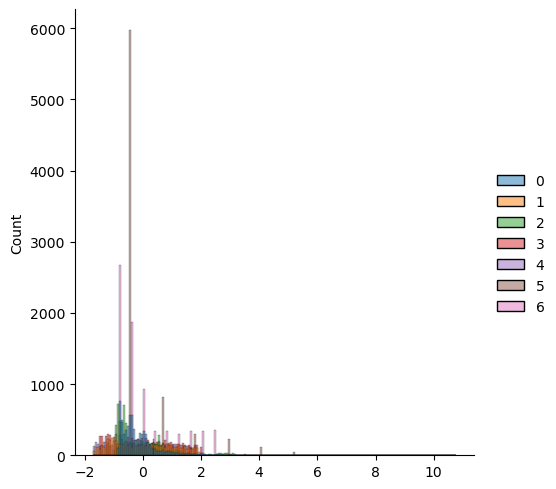

In [18]:
sns.displot(x_train_standarized)

#### Apply linear regression.


In [19]:
x_train_const = sm.add_constant(x_train_standarized.to_numpy()) # adding a constant

model = sm.OLS(y_train, x_train_const).fit()
predictions_train = model.predict(x_train_const)

x_test_const = sm.add_constant(x_test_standarized) # adding a constant
predictions_test = model.predict(x_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     753.9
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:29   Log-Likelihood:                -51074.
No. Observations:                7482   AIC:                         1.022e+05
Df Residuals:                    7474   BIC:                         1.022e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.580    168.931      0.0

#### Model Interpretation.


In [20]:
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     753.9
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:29   Log-Likelihood:                -51074.
No. Observations:                7482   AIC:                         1.022e+05
Df Residuals:                    7474   BIC:                         1.022e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.580    168.931      0.000     430.772     440.887
x1            -5.9960      2.834     -2.116      0.034     -11.551      -0.441
x2           -31.7044      2.581    -12.282      0.000     -36.764     -26.644
x3           187.0984      2.833     66.046      0.000     181.545     192.652
x4             2.0556      2.583      0.796      0.426      -3.007       7.119
x5            -0.6477      2.583     -0.251      0.802      -5.711       4.415
x6            -0.5958      2.582     -0.231      0.817      -5.656       4.465
x7            -0.1549      2.581     -0.060      0.952      -5.215       4.905
==============================================================================
Omnibus:                      798.517   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3714.401
Skew:                           0.427   Prob(JB):                         0.00
Kurtosis:                       6.344   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
model.coef_
model.intercept_
###

-3.4644757684596925

#### Model Validation


#### Model Evaluation: 
- MSE.

In [22]:
y_pred = pd.DataFrame(model.predict(x_test),columns = ['total_claim_amount'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(x_train),columns = ['total_claim_amount'])

In [23]:
mse(y_test,y_pred)

52330.37932325502

- RMSE

In [24]:
rmse = np.sqrt(mse(y_test,y_pred))
rmse

228.75834263094106

In [25]:
##prediction on the train set
mse(y_train,y_pred_train)

49747.15936894188

- MAE

In [26]:
mae(y_test,y_pred)

153.8918560923347

- R2

In [27]:
R2=r2_score(y_test,y_pred)
R2

0.39992389876814183

- Adjusted R2

In [28]:
R2_test=model.score(x_test,y_test)
R2_train=model.score(x_train,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_R2

0.3986108219601946

#### Feature Importance

In [29]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_.reshape(len(x_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,5.476729
5,number_of_open_complaints,0.668978
3,months_since_last_claim,0.203879
6,number_of_policies,0.064126
4,months_since_policy_inception,0.023162
1,income,0.001278
0,customer_lifetime_value,0.000858


#### Model Iteration

- Please rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).


- #### x-y split

In [30]:
x2 = cust_an.drop('total_claim_amount', axis=1)
y2 = cust_an.total_claim_amount

In [31]:
numericalx2 = x2.select_dtypes(np.number)
categoricalx2 = x2.select_dtypes(object)

In [32]:
# one-hot encode the categorical features
x2 = pd.concat([pd.get_dummies(x2[categoricalx2.columns],drop_first=True)], axis=1)

- Train-test split.

In [33]:
# test-train split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=TT_RATIO, random_state=RAND_STATE)
x2_train = pd.DataFrame(x2_train)
x2_test = pd.DataFrame(x2_test)
y2_train = pd.DataFrame(y2_train)
y2_test = pd.DataFrame(y2_test)

In [34]:
x2.columns

Index(['region_east', 'region_north west', 'region_west region',
       'response_yes', 'coverage_extended', 'coverage_premium',
       'education_college', 'education_doctor',
       'education_high school or below', 'education_master',
       ...
       'sales_channel_branch', 'sales_channel_call center',
       'sales_channel_web', 'vehicle_class_luxury car',
       'vehicle_class_luxury suv', 'vehicle_class_sports car',
       'vehicle_class_suv', 'vehicle_class_two-door car',
       'vehicle_size_medsize', 'vehicle_size_small'],
      dtype='object', length=101)

- Standardize the data (after the data split).

In [37]:
x2_train_standarized = sts.fit_transform(x2_train)
x2_test_standarized = sts.transform(x2_test)

In [40]:
x2_train_standarized = pd.DataFrame(x_train_standarized)

In [41]:
x2_train_standarized.mean()

0   -1.221494e-17
1   -3.024104e-17
2   -8.066997e-16
3    1.619261e-17
4   -7.799161e-17
5   -2.546153e-16
6    1.649086e-16
dtype: float64

In [42]:
x2_train_standarized.std()

0    1.000067
1    1.000067
2    1.000067
3    1.000067
4    1.000067
5    1.000067
6    1.000067
dtype: float64

- Apply linear regression.

In [45]:
x2_train_const = sm.add_constant(x2_train_standarized) # adding a constant

model2 = sm.OLS(y2_train, x2_train).fit()
#predictions_train2 = model2.predict(x2_train_const)

#x2_test_const = sm.add_constant(x2_test_standarized) # adding a constant
#predictions_test2 = model2.predict(x2_test_const)
#print_model2 = model2.summary()
#print_model2

In [40]:
model2 = lm.fit(x2_train,y2_train)
model2.coef_

array([[ 4.41621065e+00,  3.64412780e+00,  5.04906085e+00,
        -1.04959155e+01,  9.47633554e+01,  2.32703885e+02,
        -6.50611869e+00, -1.94547369e+01,  5.91637719e+00,
        -1.17092595e+01,  1.59527588e+01, -1.10812398e+01,
         3.63706930e+00,  1.24864289e+01,  1.84162653e+01,
         8.83518205e+00, -2.70371414e+00, -1.00880545e+01,
         1.54143296e+01, -7.28803380e+00,  1.94453389e+01,
         4.10500100e+01, -1.65771034e+01,  2.53805282e+01,
        -4.63541755e+00,  7.32733756e+00,  2.88420054e+01,
         3.13216735e+01,  3.25080306e+01,  1.36892108e+01,
         1.80010706e+01,  1.09318123e+01, -2.21501383e+01,
        -7.26968704e+00, -3.24261250e+00,  3.69712268e+01,
         2.66940452e+01, -2.74665835e-01, -1.45611073e+00,
        -2.80602978e+00, -1.00734120e+15, -1.00734120e+15,
        -1.00734120e+15, -1.00734120e+15, -1.00734120e+15,
        -1.00734120e+15, -1.00734120e+15, -1.00734120e+15,
        -1.00734120e+15, -1.00734120e+15, -1.00734120e+1

In [41]:
model2.intercept_

array([1.0073412e+15])

In [42]:
y2_pred = pd.DataFrame(model2.predict(x2_test),columns = ['total_claim_amount'] )      # model prediction
y2_pred_train =  pd.DataFrame(model2.predict(x2_train),columns = ['total_claim_amount'])

- Model Interpretation.

C:\Users\migue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

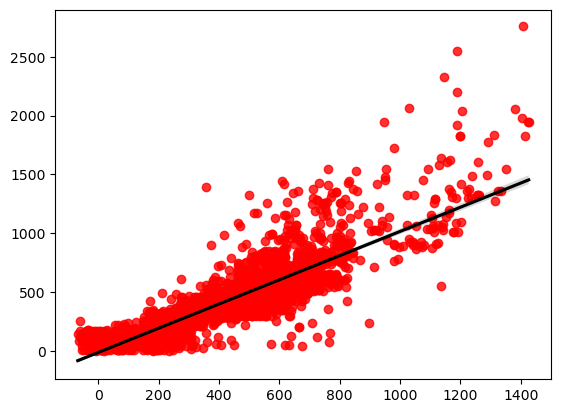

In [43]:
yp_ = y2_pred.to_numpy()
yt_ = y2_test.to_numpy()
sns.regplot(yp_,yt_,scatter_kws={"color": "red"}, line_kws={"color": "black"})

#### Model Evaluation:
- MSE.

In [44]:
mse(y2_test,y2_pred)

24357.160240294666

- RMSE.

In [45]:
rmse2 = np.sqrt(mse(y2_test,y2_pred))
rmse2

156.06780654668876

- MAE.

In [46]:
mae(y2_test,y2_pred)

104.49302307452447

- R2

In [47]:
R2_2=r2_score(y2_test,y2_pred)
R2_2

0.7206947485744595

- R2 adjusted

In [48]:
R2_test2=model2.score(x2_test,y2_test)
R2_train2=model2.score(x2_train,y2_train)
Adj2_R2= 1 - (1-R2_2)*(len(y2_test)-1)/(len(y2_test)-x2_test.shape[1]-1)
Adj2_R2

0.7116094569821956

#### Feature Importance

In [49]:
features_importances2 = pd.DataFrame(data={
    'Attribute': x2_train.columns,
    'Importance': abs(model2.coef_.reshape(len(x2_train.columns),))
})
features_importances2 = features_importances.sort_values(by='Importance', ascending=False)
features_importances2

,Attribute,Importance
2,monthly_premium_auto,5.476729
5,number_of_open_complaints,0.668978
3,months_since_last_claim,0.203879
6,number_of_policies,0.064126
4,months_since_policy_inception,0.023162
1,income,0.001278
0,customer_lifetime_value,0.000858
